# Read Data
First, we read the csv file as a Pnadas dataframe. The dataset is available on Kaggle [Link](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("/Users/basmaashour/Desktop/healthcare-dataset-stroke-data.csv") 
data = data.head(500)


# Exploratory Data Analysis
- We have 5110 samples and 12 dimensions. The coulmn id can be removed as we don't need, and the coulm stroke is our label, so 10 coulmns in total

In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   gender             500 non-null    object 
 2   age                500 non-null    float64
 3   hypertension       500 non-null    int64  
 4   heart_disease      500 non-null    int64  
 5   ever_married       500 non-null    object 
 6   work_type          500 non-null    object 
 7   Residence_type     500 non-null    object 
 8   avg_glucose_level  500 non-null    float64
 9   bmi                455 non-null    float64
 10  smoking_status     500 non-null    object 
 11  stroke             500 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 47.0+ KB


## Plotting correlation and distribution
- bmi and avg_glucose_level are tail heavy distribtuions while age approximates to a Gassian distribution

,age,avg_glucose_level,bmi
age,1.000000,0.294765,0.176959
avg_glucose_level,0.294765,1.000000,0.274322
bmi,0.176959,0.274322,1.000000


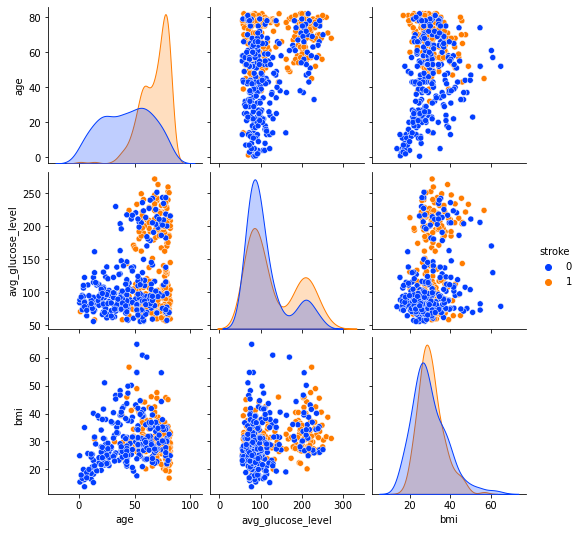

In [3]:
import seaborn as sns
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
num_cols = ['age', 'avg_glucose_level', 'bmi']
data[cat_cols] = data[cat_cols].astype('category')
data
sns.pairplot(x_vars=num_cols, y_vars=num_cols, hue='stroke', data=data, palette='bright')
data[num_cols].corr()

### Plot individual histograms for all the numeric feature columns.



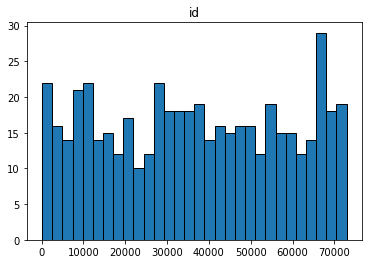

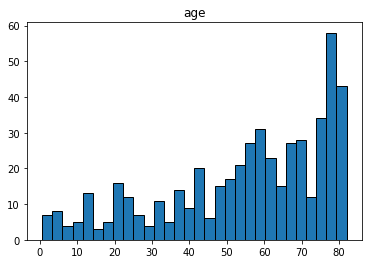

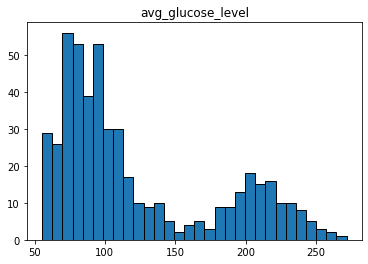

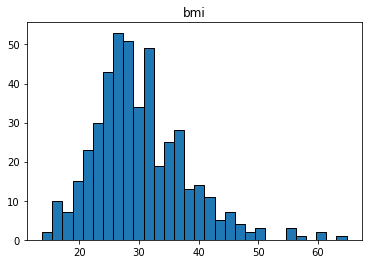

In [4]:
import matplotlib.pyplot as plt

for column in data.columns:
    if data[column].dtype.name != 'category':
        plt.hist(data[column], bins=30, edgecolor='black')
        plt.title(column)
        plt.show()

## Convert to category
- Among our predictors, we have 3 numerical features; age, avg_glucose_level, bmi. The remaining features along with the label are categorical and should be converted to category datatype, as done below.

In [5]:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
num_cols = ['age', 'avg_glucose_level', 'bmi']
data[cat_cols] = data[cat_cols].astype('category')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,34299,Female,71.0,0,0,Yes,Private,Urban,93.28,34.7,never smoked,0
496,54375,Male,5.0,0,0,No,children,Rural,122.19,35.0,Unknown,0
497,37832,Female,14.0,0,0,No,children,Rural,129.53,21.3,never smoked,0
498,21058,Female,15.0,0,0,No,children,Rural,114.53,29.1,Unknown,0


## Showing all data types

In [6]:
for column in data.columns:
        print(column,": ")
        print(data[column].value_counts())
        print()

id : 
44033    1
64908    1
5835     1
712      1
11974    1
        ..
17739    1
24905    1
60744    1
69959    1
65535    1
Name: id, Length: 500, dtype: int64

gender : 
Female    299
Male      201
Name: gender, dtype: int64

age : 
78.00    28
79.00    22
80.00    18
57.00    16
81.00    15
         ..
62.00     1
36.00     1
0.64      1
0.88      1
2.00      1
Name: age, Length: 80, dtype: int64

hypertension : 
0    408
1     92
Name: hypertension, dtype: int64

heart_disease : 
0    440
1     60
Name: heart_disease, dtype: int64

ever_married : 
Yes    386
No     114
Name: ever_married, dtype: int64

work_type : 
Private          293
Self-employed    108
Govt_job          63
children          35
Never_worked       1
Name: work_type, dtype: int64

Residence_type : 
Rural    253
Urban    247
Name: Residence_type, dtype: int64

avg_glucose_level : 
101.45    2
83.51     2
105.22    2
82.34     2
218.46    2
         ..
78.70     1
82.00     1
70.30     1
95.10     1
99.33     1
Na

## Drop some columns which is not relevent like id

In [7]:
fields_to_drop = ['id',]
data = data.drop(fields_to_drop, axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Check the empty rows 

<AxesSubplot:>

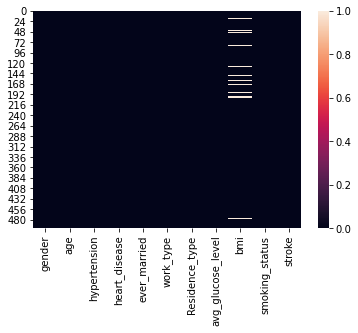

In [8]:
import seaborn as sb

sb.heatmap(data.isnull())

## Remove the rows that contains empty cell

<AxesSubplot:>

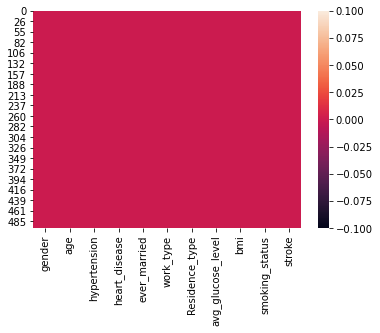

In [9]:
data = data.dropna()
sb.heatmap(data.isnull())

## One-Hot Encoded
- We need to one-hot encode our categorical columns, except the binary ones. The columns with binary string data will be label encoded.

In [10]:
from sklearn.preprocessing import LabelEncoder


mod_data = data.copy()

mod_data['gender'] = LabelEncoder().fit_transform(data['gender'])
mod_data['ever_married'] = LabelEncoder().fit_transform(data['ever_married'])
mod_data['Residence_type'] = LabelEncoder().fit_transform(data['Residence_type'])


encdf = pd.get_dummies( data[['work_type', 'smoking_status']] )
mod_data.drop(['work_type', 'smoking_status'], axis=1, inplace=True)
mod_data = mod_data.join(encdf)
mod_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0


# Model Tranining & Tuning


## Spliting the dataset into 80/20 train test split

In [11]:
from sklearn.model_selection import train_test_split

# add stroke data into y 
y = mod_data.pop('stroke')

# now add the rest of data in x and already removed y in perv step
X = mod_data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(y)


0      1
2      1
3      1
4      1
5      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: stroke, Length: 455, dtype: category
Categories (2, int64): [0, 1]


# Add Models

## Add Complexity Curve Method

In [12]:
import numpy as np
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
from sklearn.model_selection import validation_curve


def curve_model(X, Y, model, param_name, parameters, cv, ylim, log=True):
    train_scores, test_scores = validation_curve(model, X, Y, param_name=param_name, param_range=parameters, cv=cv,
                                                 scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Complexity curve")
    plt.fill_between(parameters, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameters, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")

    if log == True:
        plt.semilogx(parameters, train_scores_mean, 'o-', color="r", label="Training score")
        plt.semilogx(parameters, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    else:
        plt.plot(parameters, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(parameters, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    #plt.ylim([0.55, 0.9])
    if ylim is not None:
        plt.ylim(*ylim)

    plt.ylabel('Score')
    plt.xlabel(param_name)
    plt.legend(loc="best")

    return plt

## Add learning Curve Method


In [13]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve


def learning_curve_model(X, Y, model, cv, train_sizes):
    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()


cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
train_size = np.linspace(.1, 1.0, 15)

##  1.1 Add Decision Tree Model 
- Train the model and show the accuracy 

1.0
1.0
1.0


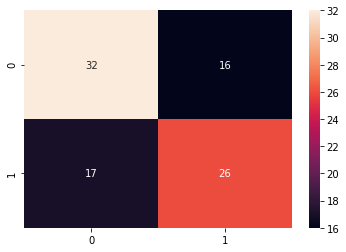

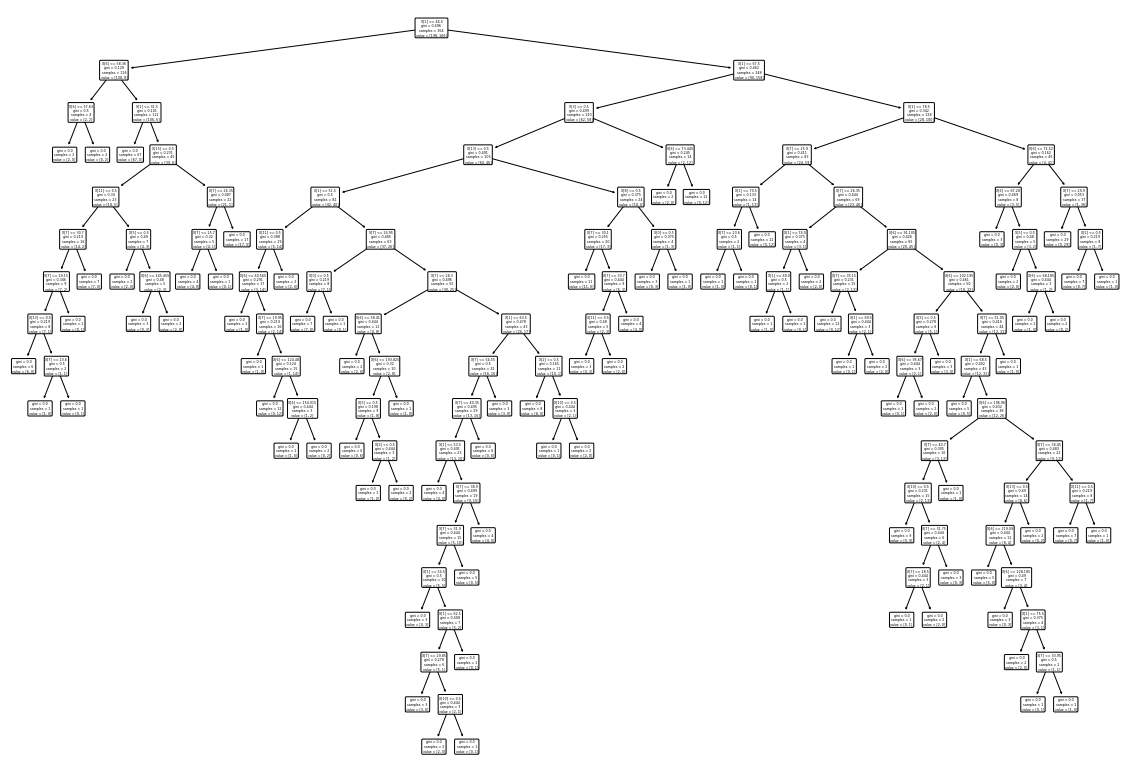

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score ,confusion_matrix
from sklearn import tree


dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)


print(accuracy_score(y_train, dtree.predict(X_train)))
print(f1_score(y_train, dtree.predict(X_train)))
print(roc_auc_score(y_train, dtree.predict(X_train)))

dtree_predict = dtree.predict(X_test)
dtree_cm = confusion_matrix(y_test, dtree_predict)
sns.heatmap(dtree_cm,annot=True)


plt.figure(figsize = (20,14))
tree.plot_tree(dtree, rounded=True)
plt.show()


## 1.2 Decision Tree Hyperparameter Tuning
- will be using GridSearchCV 


In [15]:
from sklearn.model_selection import GridSearchCV

dtparam = {"max_depth":[3,5,10,None], 'max_features':['auto',8,16,None]}
dtcv = GridSearchCV(dtree, param_grid=dtparam, cv=10, scoring=['f1','accuracy'], refit='f1')
dtcv.fit(X_train,y_train)

print(dtcv.best_estimator_)
print(dtcv.best_score_)
print(dtcv.cv_results_['mean_test_accuracy'][dtcv.best_index_])

DecisionTreeClassifier(max_depth=3, max_features=16, random_state=0)
0.7028580156402737
0.7334834834834835


## 1.3 Decision Tree Learning Curve

In [16]:
#learning_curve_model(X, y, dtcv, cv, train_size)


## 2.1 Add Logistic Regression Model 
- Train the model and show the accuracy 

0.760989010989011
0.7478260869565216
0.7622915906048435


<AxesSubplot:>

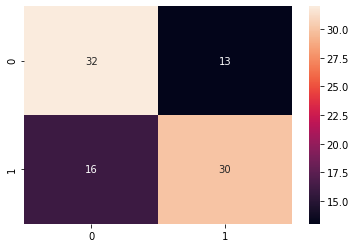

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

lg = LogisticRegression(solver="lbfgs",multi_class="auto",max_iter=5000)
lg.fit(X_train,y_train)

print(accuracy_score(y_train, lg.predict(X_train)))
print(f1_score(y_train, lg.predict(X_train)))
print(roc_auc_score(y_train, lg.predict(X_train)))

lg_predict = lg.predict(X_test)
lg_cm = confusion_matrix(lg_predict,y_test)
sns.heatmap(lg_cm,annot=True)


## 2.2 Logistic Regression Learning Curve

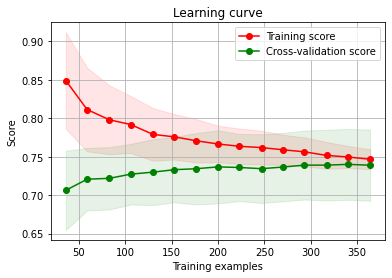

In [18]:
learning_curve_model(X, y, lg, cv, train_size)

##  3.1 Add k-Nearest Neighbours Model 
- Train the model and show the accuracy

0.7939560439560439
0.7540983606557377
0.7857794815626141


<AxesSubplot:>

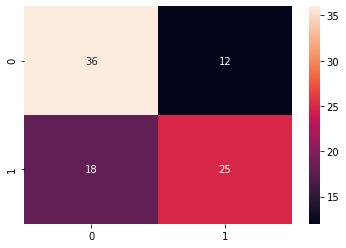

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

kn = KNeighborsClassifier(n_neighbors=4)
kn.fit(X_train,y_train)

print(accuracy_score(y_train, kn.predict(X_train)))
print(f1_score(y_train, kn.predict(X_train)))
print(roc_auc_score(y_train, kn.predict(X_train)))

kn_predict = kn.predict(X_test)
kn_cm = confusion_matrix(y_test,kn_predict)
sns.heatmap(kn_cm,annot=True)



## 3.2 k-Nearest Neighbours Learning Curve

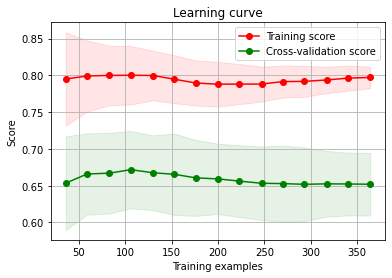

In [20]:
learning_curve_model(X, y, kn, cv, train_size)

## 3.3 k-Nearest Neighbours Complexity Curve

<module 'matplotlib.pyplot' from '/Users/basmaashour/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

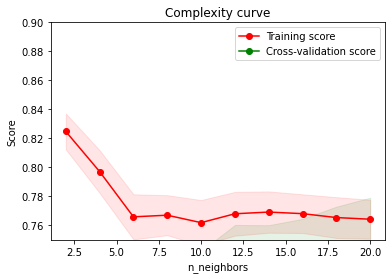

In [21]:
param_range = np.linspace(2, 20, 10).astype(int)
param_name = "n_neighbors"
ylim = [0.75, 0.90]
curve_model(X, y, kn, "n_neighbors", param_range, cv, ylim, log=False)

##  4.1 Add Suport Vector Machine Model 
- Train the model and show the accuracy

0.7362637362637363
0.728813559322034
0.7395643178775708


<AxesSubplot:>

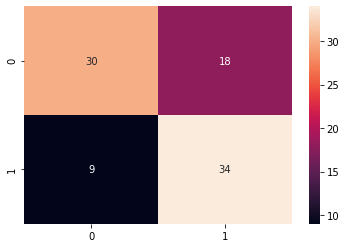

In [22]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(accuracy_score(y_train, svm.predict(X_train)))
print(f1_score(y_train, svm.predict(X_train)))
print(roc_auc_score(y_train, svm.predict(X_train)))

svm_predict = svm.predict(X_test)
svm_cm = confusion_matrix(y_test,svm_predict)
sns.heatmap(svm_cm,annot=True)

## 4.3 Suport Vector Machine Learning Curve

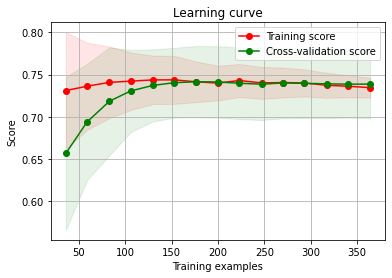

In [23]:
learning_curve_model(X, y, svm, cv, train_size)

## 4.4 Suport Vector Machine Complexity Curve

<module 'matplotlib.pyplot' from '/Users/basmaashour/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

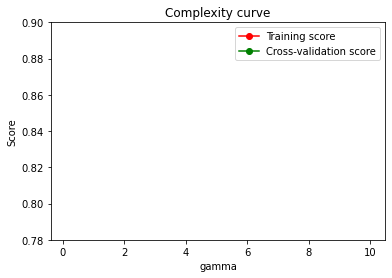

In [24]:

param_range = np.linspace(0.1, 10, 10)
param_name = "C"
ylim = [0.78, 0.90]
curve_model(X, y, svm, "gamma", param_range, cv, ylim, log=False)

##  5.1 Add  Naive Bayes machine Model 
- Train the model and show the accuracy

0.7335164835164835
0.7454068241469816
0.7433674090300596


<AxesSubplot:>

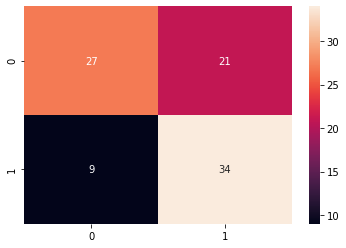

In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

print(accuracy_score(y_train, nb.predict(X_train)))
print(f1_score(y_train, nb.predict(X_train)))
print(roc_auc_score(y_train, nb.predict(X_train)))

nb_predict = nb.predict(X_test)
sns.heatmap(confusion_matrix(y_test,nb_predict),annot=True)

## 5.2 Naive Bayes Machine Learning Curve

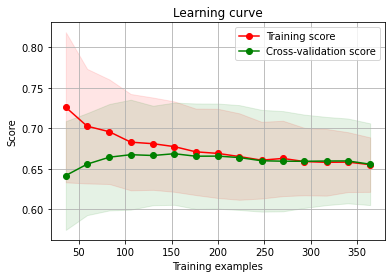

In [26]:
learning_curve_model(X, y, nb, cv, train_size)

## 6. Ensemble Model 


0.7637362637362637
0.7295597484276729
0.7584884994523547


<AxesSubplot:>

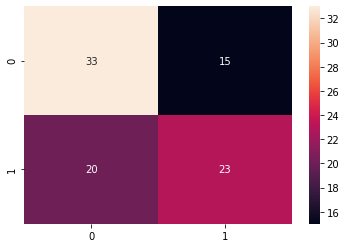

In [27]:

from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

bagging.fit(X_train, y_train)


print(accuracy_score(y_train, bagging.predict(X_train)))
print(f1_score(y_train, bagging.predict(X_train)))
print(roc_auc_score(y_train, bagging.predict(X_train)))

bagging_predict = bagging.predict(X_test)
sns.heatmap(confusion_matrix(y_test,bagging_predict),annot=True)

# Accuracy Score of all models

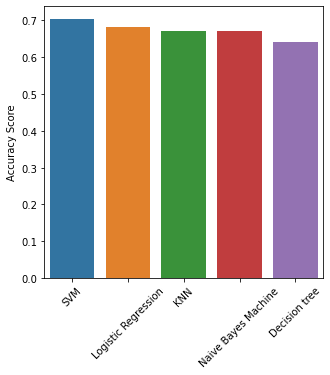

In [28]:
def drawAcuuracyGraph():
    models = {"Decision tree": dtcv,
              "KNN": kn,
              "Naive Bayes Machine": nb,
              "SVM": svm,
              "Logistic Regression": lg}

    scores = {}
    for key, value in models.items():
        model = value
        model.fit(X_train, y_train)
        scores[key] = model.score(X_test, y_test)

    scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
    scores_frame.sort_values(by=["Accuracy Score"], axis=0, ascending=False, inplace=True)
    scores_frame

    plt.figure(figsize=(5, 5))
    sns.barplot(x=scores_frame.index, y=scores_frame["Accuracy Score"])
    plt.xticks(rotation=45)


drawAcuuracyGraph()

# AUC

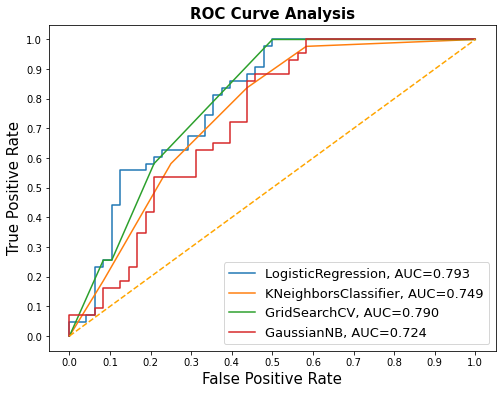

In [29]:
def drawauc():
    models = [lg,
              kn,
              dtcv,
             nb]

    result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])
    from sklearn.metrics import roc_curve, roc_auc_score
    import numpy as np

    # Train the models and record the results

    for cls in models:
        model = cls.fit(X_train, y_train)
        yproba = model.predict_proba(X_test)[::, 1]

        fpr, tpr, _ = roc_curve(y_test, yproba)
        auc = roc_auc_score(y_test, yproba)

        result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                            'fpr': fpr,
                                            'tpr': tpr,
                                            'auc': auc}, ignore_index=True)

        # Set name of the classifiers as index labels
    result_table.set_index('classifiers', inplace=True)

    fig = plt.figure(figsize=(8, 6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'],
                 result_table.loc[i]['tpr'],
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size': 13}, loc='lower right')

    plt.show()


drawauc()

# PCA

In [32]:

from sklearn.decomposition import PCA

#pca = PCA(.95)
#pca.fit(X_train)
#trainX = pca.transform(y_train)
#validationX = pca.transform(X_test)

#drawAcuuracyGraph()